# SAT

In [1]:
!pip3 install z3-solver
!pip3 install -e .

You should consider upgrading via the 'C:\Users\aless\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: c:\Users\aless\Desktop\Combinatorial_Project\SAT\src
You should consider upgrading via the 'C:\Users\aless\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
from itertools import combinations
import math
import time
import os
from tqdm import tqdm
import numpy as np
import sys
import shutil

base_dir = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd() + 'sat.ipynb')))
sys.path.append(base_dir)
from VLSISolver import VLSISolver
import sat_utils
import utils.utils as utils

## Define constants

In [3]:
# Override the previous results
OVERRIDE = False

# Interrupt SAT solver after a certain amout of time 
INTERRUPT = True

# Print middle results
PRINT = False

# Number of instances to work on (part of the total)
NUMBER_OF_INSTANCES = 10

# Number of seconds before interrupt the SAT solver
TIME_AVAILABLE = 300

## Fix directories and savings

In [4]:
DIRECTORIES = ['../img/', '../out/', '../stats/']

if OVERRIDE:
    for directory in DIRECTORIES:
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory, exist_ok=True)

## Solve problems

In [5]:
def solve(solver, rotation, symmetry_breaking, encoding_type):

    NAME = solver.get_name() + ('rot_' if rotation else 'not_rot_') + ('sb_' if symmetry_breaking else 'not_sb_') + encoding_type

    OUT_DIRECTORY_PATH = '../out/' + NAME + '/'
    IMG_DIRECTORY_PATH = '../img/' + NAME + '/'
    STATS_PATH = '../stats/' + NAME + '.csv'

    os.makedirs(OUT_DIRECTORY_PATH, exist_ok=True)
    os.makedirs(IMG_DIRECTORY_PATH, exist_ok=True)
    
    for i in range(NUMBER_OF_INSTANCES):

        OUT_FILE_PATH = OUT_DIRECTORY_PATH + str(i+1) + '.txt'
        IMG_FILE_PATH = IMG_DIRECTORY_PATH + str(i+1) + '.jpg'
        
        if PRINT:
            print(f'Instance number: {str(i)}')

        stats = utils.load_stats(STATS_PATH)
        if i not in stats.index or OVERRIDE:
            print('- Computing solution...')
            
            # Load instance
            plate_width, n_chips, chips_widths, chips_heights = utils.load_data(i + 1)

            # Solve instance
            vlsi_solver = solver(plate_width, 
                                 n_chips, 
                                 chips_widths, 
                                 chips_heights, 
                                 rotation = rotation, 
                                 symmetry_breaking = symmetry_breaking,
                                 encoding_type=encoding_type,
                                 time_available = TIME_AVAILABLE,
                                 interrupt = INTERRUPT)
            is_solved = vlsi_solver.solve()
            
            # Print results
            if PRINT:
                print(f'-- Problem solved? {is_solved}')
                print(f'-- Time required: {vlsi_solver.solving_time} seconds')

            if is_solved:

                # Evaluate the solution
                pos_x, pos_y, chips_w_a, chips_h_a, plate_width, plate_height, solving_time = vlsi_solver.get_solution_parsed()
                
                # Print solution
                if PRINT:
                    utils.plot_device(pos_x, pos_y, chips_w_a, chips_h_a, plate_width, plate_height)
                
                # Save results
                utils.plot_device(pos_x, pos_y, chips_w_a, chips_h_a, plate_width, plate_height, IMG_FILE_PATH)
                utils.write_sol(OUT_FILE_PATH, 
                                plate_width, 
                                plate_height, 
                                n_chips, 
                                chips_widths, 
                                chips_heights, 
                                pos_x, 
                                pos_y)
            else:
                solving_time = TIME_AVAILABLE

            utils.write_stat_line(STATS_PATH,
                                  i + 1,
                                  plate_height,
                                  vlsi_solver.min_height,
                                  solving_time)


        else:
            print('- Loading solution...')

            # Load results
            try:
                plate_width, plate_height, n_chips, chips_w_a, chips_h_a, pos_x, pos_y = utils.load_sol(OUT_FILE_PATH)
                stats = utils.load_stats(STATS_PATH)
            
                # Print result and solution
                if PRINT:
                    print(f'-- Time required: {stats.at[i, "time"]} seconds')
                    utils.plot_device(pos_x, pos_y, chips_w_a, chips_h_a, plate_width, plate_height)
            except OSError:
                print(f'-- Time exceeded!')
                
            
    utils.display_times(STATS_PATH)     
    return STATS_PATH       

### Let's find out which is the best encoder

- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...


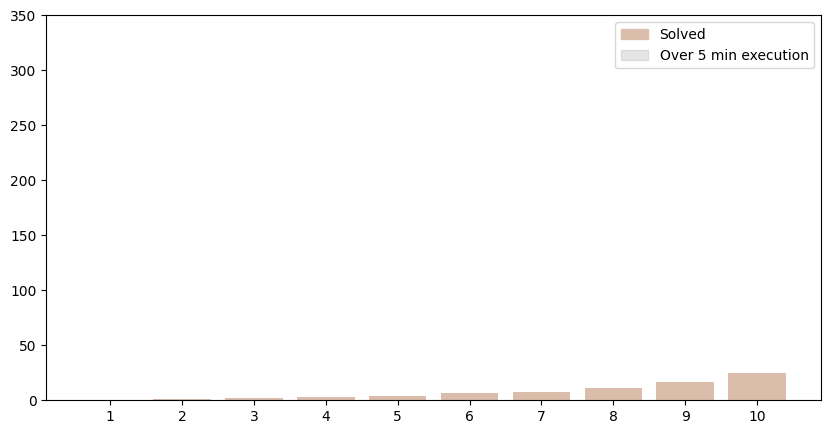

- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...


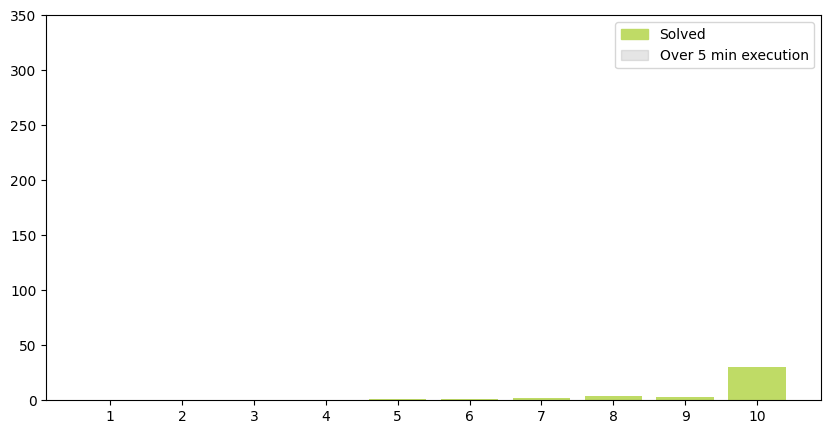

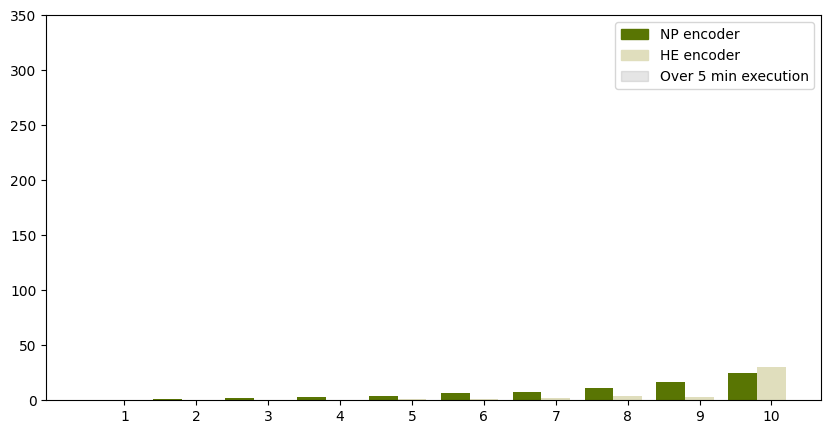

In [6]:
csv_without_rotation_paths = []
csv_without_rotation_paths.append(solve(False, False, 'np'))
csv_without_rotation_paths.append(solve(False, False, 'he'))
utils.display_times_comparison(csv_without_rotation_paths, ['NP encoder', 'HE encoder', 'Unsolved'], NUMBER_OF_INSTANCES)

In [7]:
BEST_ENCODER = 'he'

### Without rotation

In [8]:
csv_without_rotation_paths = []

#### Without symmetry breaking

- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...


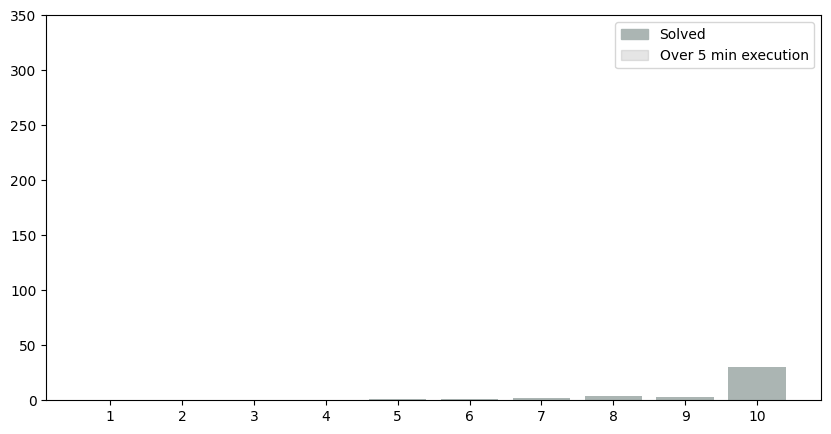

In [9]:
ROTATION = False
SYMMETRY_BREAKING = False

csv_without_rotation_paths.append(solve(ROTATION, SYMMETRY_BREAKING, BEST_ENCODER))

#### With symmetry breaking

- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...


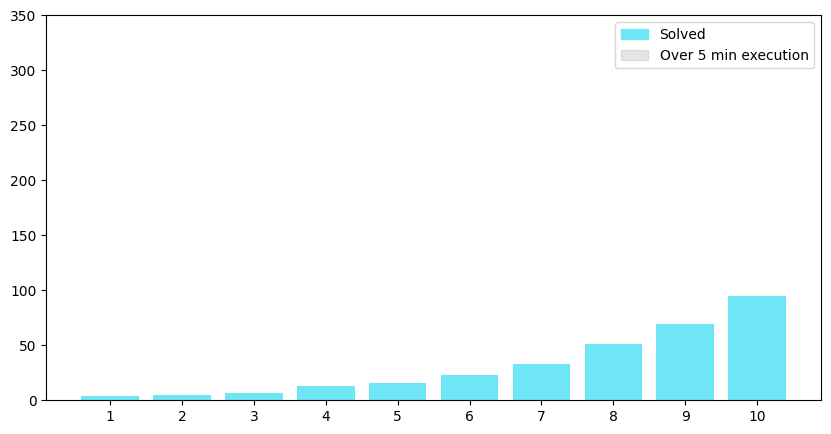

In [10]:
ROTATION = False
SYMMETRY_BREAKING = True

csv_without_rotation_paths.append(solve(ROTATION, SYMMETRY_BREAKING, BEST_ENCODER))

#### Comparison

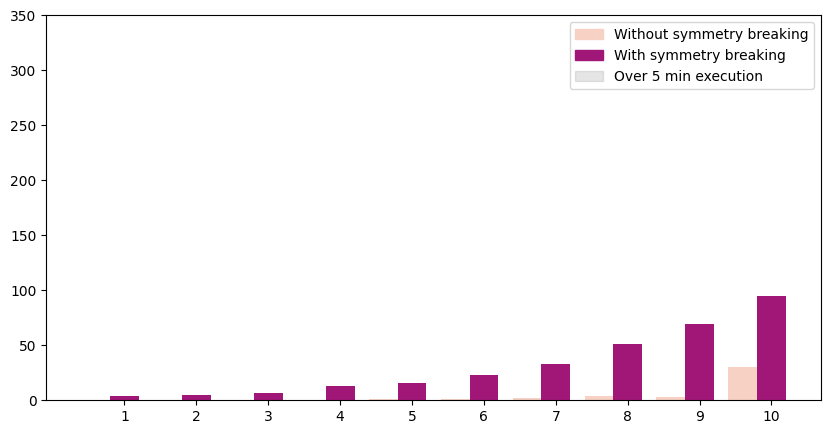

In [11]:
utils.display_times_comparison(csv_without_rotation_paths, ['Without symmetry breaking', 'With symmetry breaking', 'Unsolved'], NUMBER_OF_INSTANCES)

### With rotation

In [12]:
csv_with_rotation_paths = []

#### Without symmetry breaking

- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...


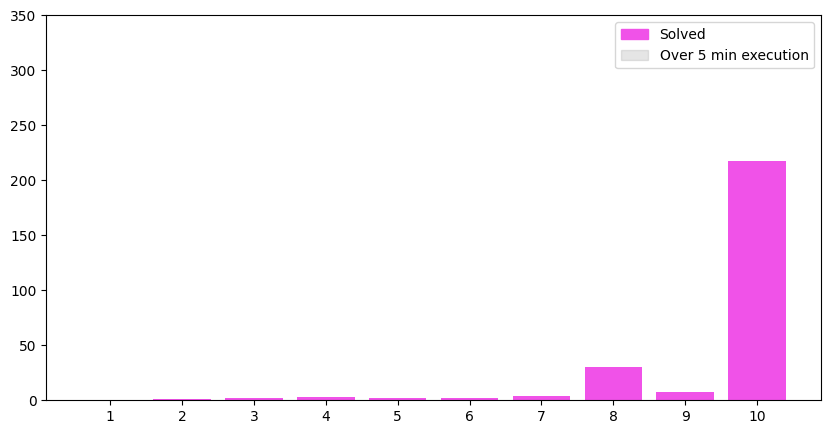

In [13]:
ROTATION = True
SYMMETRY_BREAKING = False

csv_with_rotation_paths.append(solve(ROTATION, SYMMETRY_BREAKING, BEST_ENCODER))

#### With symmetry breaking

- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
- Loading solution...
-- Time exceeded!


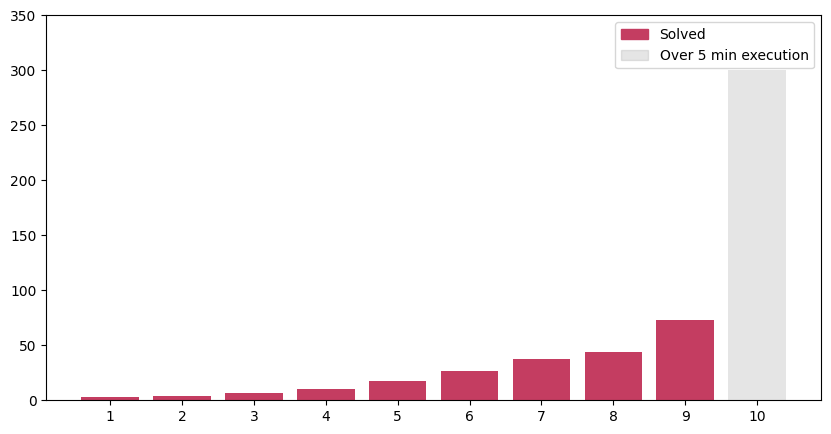

In [14]:
ROTATION = True
SYMMETRY_BREAKING = True

csv_with_rotation_paths.append(solve(ROTATION, SYMMETRY_BREAKING, BEST_ENCODER))

## Comparison

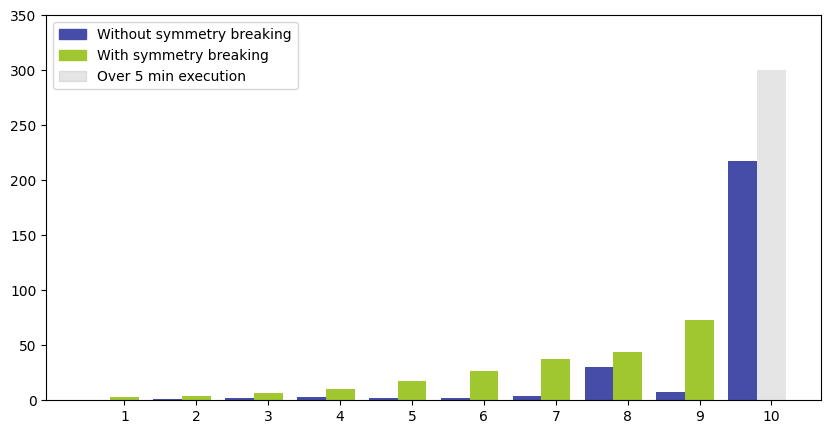

In [15]:
utils.display_times_comparison(csv_with_rotation_paths, ['Without symmetry breaking', 'With symmetry breaking', 'Unsolved'], NUMBER_OF_INSTANCES)